Se quiere saber a partir de diversos datos meteorológicos si es un buen día para jugar al tenis.
Utilizando el archivo tenis.csv:

- Obtener los datos
- Entrenar el modelo
- Realizar predicciones y evaluar el modelo

¿Qué resultados da el modelo? ¿Por qué?

¿Qué resultado se obtiene para las siguientes condiciones?

- Outlook: Rain
- Temperature: Cool
- Humidity: Normal
- Wind: Strong


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# Datos

In [2]:
df = pd.read_csv("tenis.csv")
df

,Outlook,temperature,humidity,wind,playtennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


# Procesar datos

In [3]:
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)
df.head()

,Outlook,temperature,humidity,wind,playtennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


# Valores datos

In [4]:
data = df.values[:,0:4]
data

array([[2, 1, 0, 1],
       [2, 1, 0, 0],
       [0, 1, 0, 1],
       [1, 2, 0, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 0],
       [0, 0, 1, 0],
       [2, 2, 0, 1],
       [2, 0, 1, 1],
       [1, 2, 1, 1],
       [2, 2, 1, 0],
       [0, 2, 0, 0],
       [0, 1, 1, 1],
       [1, 2, 0, 0]])

# Etiquetas

In [5]:
labels = df.values[:,4]
labels

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

# Entrenamiento y prueba

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3)

# Crear predicciones - Entrenamiento

In [7]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

# Obtener predicciones

In [8]:
y_pred = gnb.predict(X_test)
y_pred

array([1, 0, 0, 0, 0])

# Comprobar predicciones

In [9]:
metrics.accuracy_score(y_test, y_pred)

0.8

# Matriz

In [10]:
metrics.confusion_matrix(y_test, y_pred)

array([[3, 0],
       [1, 1]])

## Gráfica de matriz

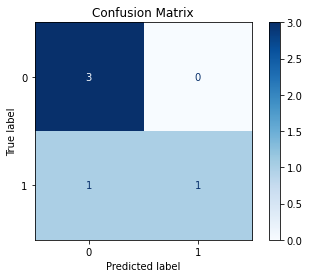

In [11]:
disp = metrics.plot_confusion_matrix(gnb, X_test, y_test,cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix')
plt.show()

# Pruebas en particular
¿Qué resultado se obtiene para las siguientes condiciones?

- Outlook: Rain
- Temperature: Cool
- Humidity: Normal
- Wind: Strong

In [12]:
pred = [[1,0,1,0]]
y_pred = gnb.predict(pred)
y_pred

array([1])

Para este caso el modelo define que se puede jugar al tenis

# Conclusión

El sistema no es estable, el algortimo trabaja de manera estadística por lo que el **dataset** de entrada no es el apropiado. *(Los datos de entrada son categóricos)*